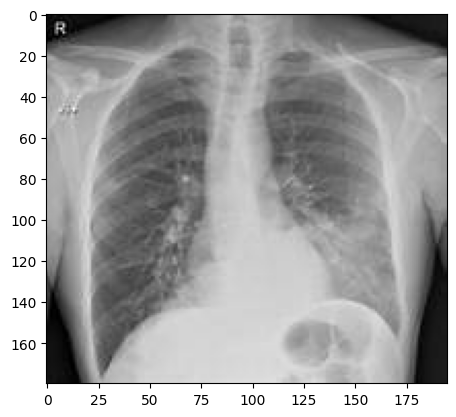

In [5]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/opacity.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

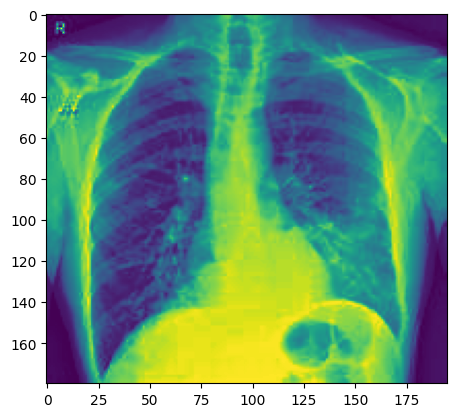

In [8]:
import cv2
gray_image = cv2.imread('/content/opacity.jpeg', cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(gray_image)
cv2.imwrite('equalized_image.png', equalized_image)
plt.imshow(equalized_image)


In [43]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/lung data/Lung X-Ray Image/Lung X-Ray Image/lung_tumor_features_with_labels.csv')

df.sample()

,Image_ID,Label,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_8090,Feature_8091,Feature_8092,Feature_8093,Feature_8094,Feature_8095,Feature_8096,Feature_8097,Feature_8098,Feature_8099
882,780.jpg,folder_1_label,0.35432,0.041161,0.0,0.0,0.002412,0.0,0.0,0.0,...,0.544085,0.137043,0.025954,0.01725,0.003409,0.036594,0.003409,0.011966,0.008211,0.021836


In [48]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.decomposition import PCA
import joblib

# Function to preprocess an image and extract HOG features
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized_image = cv2.equalizeHist(image)
    resized_img = cv2.resize(equalized_image, (128, 128))

    features, _ = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    return features

# Assume df is your original DataFrame with image features
# Let's fit PCA to your features
pca = PCA(n_components=25)
reduced_features = pca.fit_transform(df.iloc[:, 2:])  # Adjust according to your DataFrame structure
df2 = pd.DataFrame(reduced_features)

# Save the trained PCA model (optional)
joblib.dump(pca, 'trained_pca_model.pkl')  # Save the PCA model for later use

# Function to preprocess a new image and apply PCA
def preprocess_with_pca(image_path, pca_model):
    # Extract features from the image
    features = preprocess_image(image_path)

    # Convert features to DataFrame for PCA
    df = pd.DataFrame([features])  # Wrap the feature in a list to match input shape

    # Apply the trained PCA model to reduce dimensionality
    reduced_features = pca_model.transform(df)  # Use transform to apply PCA

    # Create a DataFrame from the reduced features
    df2 = pd.DataFrame(reduced_features)

    return df2  # Return the DataFrame containing the reduced features

# Example usage with a new image
img_path = '/content/opacity.jpeg'
trained_pca = joblib.load('trained_pca_model.pkl')  # Load the trained PCA model if saved

df2_new_image = preprocess_with_pca(img_path, trained_pca)  # Use the trained PCA model
 # This will display the DataFrame for the new image
df2_new_image


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.686133,0.847593,-1.655719,-0.216787,-1.348871,0.174552,-0.18732,-0.633523,1.901034,0.144415,...,-0.203593,-0.229466,-0.604585,0.544256,-0.024223,0.703136,0.586493,-0.009412,-0.404536,-0.16361
